## Задание 1  

$X_{1},\ldots,X_n\backsim R[0,\theta],\hat{\theta}=max\{X_1,\ldots,X_n\} $

$n=50,theta=1$

<AxesSubplot:ylabel='Count'>

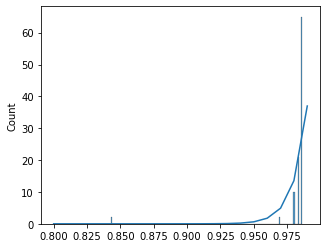

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sc
import seaborn as sb
n=100
t=[]
sample=sc.uniform.rvs(size=50)
for i in range(n):
    t.append(max(np.random.choice(sample, 50)))
x=np.arange(0.8, 1, 1/100)
plt.figure(figsize = (5,4))
plt.plot(x, list(map(lambda y: n*(y**(n-1)),x)))
sb.histplot(t) 

## Задание 2

In [4]:
sample=sc.norm.rvs(loc=5, scale=1,size=100)
from IPython.display import Latex
n=100
t=[]
for i in range(n):
    t.append(np.exp(np.mean(np.random.choice(sample,100))))
print('Стандартное отклонение '+str(np.sqrt(np.var(t))))
print(np.exp(np.mean(sample))+sc.norm.ppf(0.025)*np.sqrt(np.var(t)),
       (np.exp(np.mean(sample))-sc.norm.ppf(0.025)*np.sqrt(np.var(t))))

Стандартное отклонение 16.4117852365704
106.27364519653098 170.6066611678993


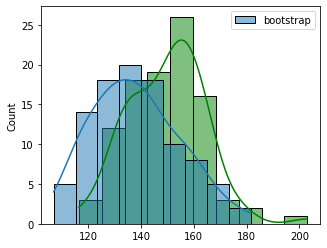

In [9]:
s=[]
for i in range(n):
    s.append(np.exp(np.mean(sc.norm.rvs(loc=5, scale=1,size=100))))
plt.figure(figsize = (5,4))
sb.histplot(s, kde = True, color = 'green') 
sb.histplot(t, kde = True, label='bootstrap') 
plt.legend()

## Задание 3

In [82]:
n = 5000
k = 50 
sigma = 1
alpha = 0.05
sample = np.exp(sc.norm.rvs(size = n))
t = (np.exp(sigma ** 2) + 2) * np.sqrt((np.exp(sigma ** 2) - 1))
bs = []
for i in range(k):
    bs.append(np.random.choice(sample, n))
t_bs = [ np.mean([(x - np.mean(i)) ** 3 / np.sqrt(np.var(i))**3 for x in i]) for i in bs ]
t_emp = np.mean([(x - np.mean(sample)) ** 3 / np.sqrt(np.var(sample))**3 for x in sample])

In [84]:
#calculate Normal interval
D = np.var(t_bs)
se = D ** 0.5
Norm_interval = (t_emp - sc.norm.ppf(1-alpha/2)*se, t_emp + sc.norm.ppf(1-alpha/2)*se)


In [85]:
#calculate pivot interval
quant1 = 0
quant2 = 0
while((quant1) / k < 1- alpha/2):
    quant1 += 1
    
while((quant2) / k < alpha/2):
    quant2 += 1
    
t1 = t_bs[quant1 - 1]
t2 = t_bs[quant2 - 1]

Pivot_interval = (2 * t_emp - t1, 2 * t_emp - t2)

In [86]:
#calculate percentile interval
Percentile_interval = (t2, t1)

In [87]:
print("Истинное значение статистики: " + str(t) + \
      "\nНормальный доверительный интервал уровня " + str(alpha) + ": " + str(Norm_interval) + \
      "\nPivot доверительный интервал уровня " + str(alpha) + ": " + str(Pivot_interval) + \
      "\nPercentile доверительный интервал уровня " + str(alpha) + ": " + str(Percentile_interval))
t_emp

Истинное значение статистики: 6.184877138632554
Нормальный доверительный интервал уровня 0.05: (4.227653699478578, 5.987792796160818)
Pivot доверительный интервал уровня 0.05: (4.748377436737252, 5.36563297499636)
Percentile доверительный интервал уровня 0.05: (4.849813520643036, 5.467069058902144)


5.107723247819698

## Задание 4

In [61]:
n = 25
sample = sc.t.rvs(3, size = n)
t = (sc.t.ppf(df = 3, q = 0.75) - sc.t.ppf(df = 3, q = 0.25))/1.34

In [62]:
def find_t_emp(x):
    y = sorted(x)
    quant2  = 0
    while(quant2 / n < 0.75):
        quant2 += 1
    quant1  = 0
    while(quant1 / n < 0.25):
        quant1 += 1
    return (y[quant2 - 1] - y[quant1 - 1]) / 1.34
bs = []
for i in range(k):
    bs.append(np.random.choice(sample, n))
t_bs = sorted([find_t_emp(x) for x in bs])
t_emp = find_t_emp(sample)
alpha = 0.05

In [63]:
#calculate Normal interval
D = np.var(t_bs)
se = D ** 0.5
Norm_interval = (t_emp - sc.norm.ppf(1-alpha/2)*se, t_emp + sc.norm.ppf(1-alpha/2)*se)

In [64]:
#calculate pivot interval
quant1 = 0
quant2 = 0
while((quant1) / k < 1- alpha/2):
    quant1 += 1
    
while((quant2) / k < alpha/2):
    quant2 += 1
    
t1 = t_bs[quant1 - 1]
t2 = t_bs[quant2 - 1]

Pivot_interval = (2 * t_emp - t1, 2 * t_emp - t2)

In [65]:
#calculate percentile interval
Percentile_interval = (t2, t1)

In [66]:
print("Истинное значение статистики: " + str(t) + \
      "\nНормальный доверительный интервал уровня " + str(alpha) + ": " + str(Norm_interval) + \
      "\nPivot доверительный интервал уровня " + str(alpha) + ": " + str(Pivot_interval) + \
      "\nPercentile доверительный интервал уровня " + str(alpha) + ": " + str(Percentile_interval))

Истинное значение статистики: 1.1416303404192403
Нормальный доверительный интервал уровня 0.05: (0.2476998100106378, 1.5325364798156387)
Pivot доверительный интервал уровня 0.05: (-0.10690358524186916, 1.517348259365388)
Percentile доверительный интервал уровня 0.05: (0.26288803046088854, 1.8871398750681456)


In [74]:
s = 100
for i in range(100):
    s += np.random.choice([-1, 1], p = [0.1, 0.9] )
    print(s)

101
100
101
102
103
104
105
104
105
106
107
108
109
110
111
112
113
114
113
114
115
116
117
118
119
120
121
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
135
136
137
138
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
150
151
152
151
152
153
154
155
156
157
158
159
160
159
160
161
162
163
164
165
166
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [ ]:
conda update sympy
